In [1]:
# libary
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm;
import statsmodels.formula.api as ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, MinMaxScaler

%matplotlib inline
# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 22.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [20, 6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("data/회귀분석용 데이터.xlsx")
del data['Unnamed: 0']

In [3]:
data

,ID,주택금융가능여부18/1,등락율18/1,전세가율18/1,전용면적18/1,건축년도18/1,건물나이18/1,세대수,세대당주차수,지하주차비율,관리시설수,거래금액(만원)_18/1
0,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,0,4.162633,32.7,80,1987.0,31.0,NaN,NaN,NaN,NaN,129125.0
1,서울특별시 강남구 개포동 개포주공1단지 40,0,16.507998,7.0,40,1982.0,36.0,NaN,NaN,NaN,NaN,145736.8
2,서울특별시 강남구 개포동 개포주공5단지 60,0,0.000000,31.2,60,1983.0,35.0,940.0,0.693617,0.000000,5.0,136666.7
3,서울특별시 강남구 개포동 개포주공5단지 80,0,0.000000,25.4,80,1983.0,35.0,940.0,0.693617,0.000000,5.0,177416.7
4,서울특별시 강남구 개포동 개포주공6단지 50,0,9.134234,30.1,50,1983.0,35.0,1060.0,1.037736,0.000000,3.0,125900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4086,서울특별시 중랑구 중화동 중화동건영아파트 60,1,6.000000,10.0,60,1998.0,20.0,NaN,NaN,NaN,NaN,25000.0
4087,서울특별시 중랑구 중화동 태능에셈빌 80,1,0.000000,42.9,80,2005.0,13.0,NaN,NaN,NaN,NaN,35000.0
4088,서울특별시 중랑구 중화동 한신아파트 50,1,0.000000,77.4,50,1997.0,21.0,1544.0,0.970855,0.683122,5.0,31756.2
4089,서울특별시 중랑구 중화동 한신아파트 60,1,2.996064,76.9,60,1997.1,20.9,1544.0,0.970855,0.683122,5.0,36534.6


In [12]:
def heatmap(dataset):
    cmap = plt.cm.PuBu
    corr = dataset.corr()
    plt.figure(figsize=(25, 16))  
    sns.heatmap(corr, linewidths = 0.1, 
                vmax = 1.0, 
                square = True, 
                cmap = 'seismic', 
                linecolor = "white", 
                annot = True, 
                annot_kws = {"size" : 10})

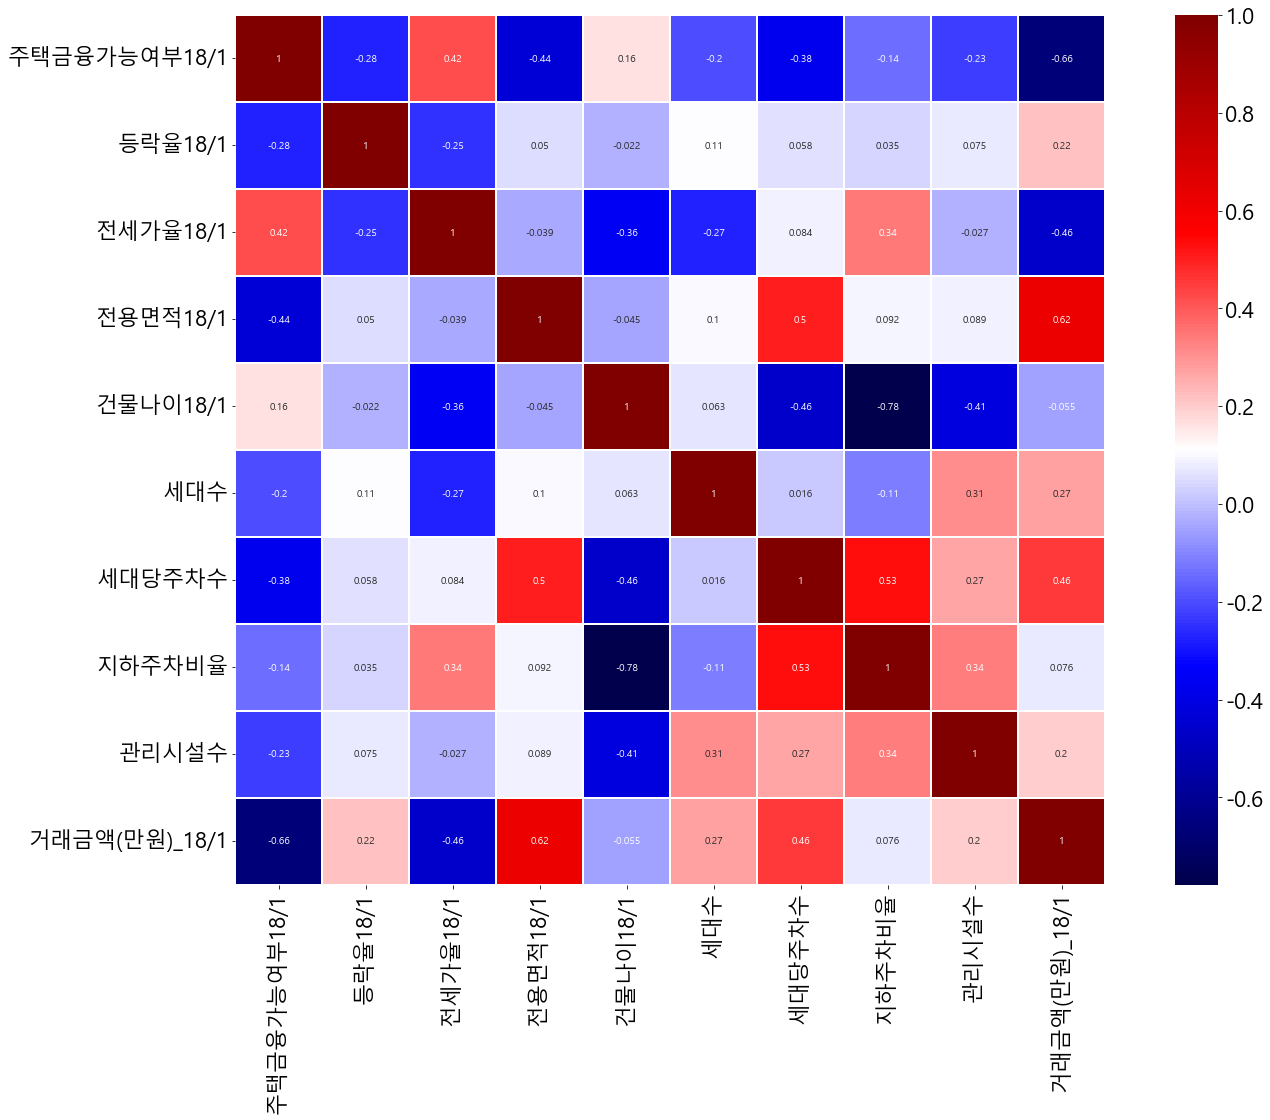

In [13]:
heatmap(data)

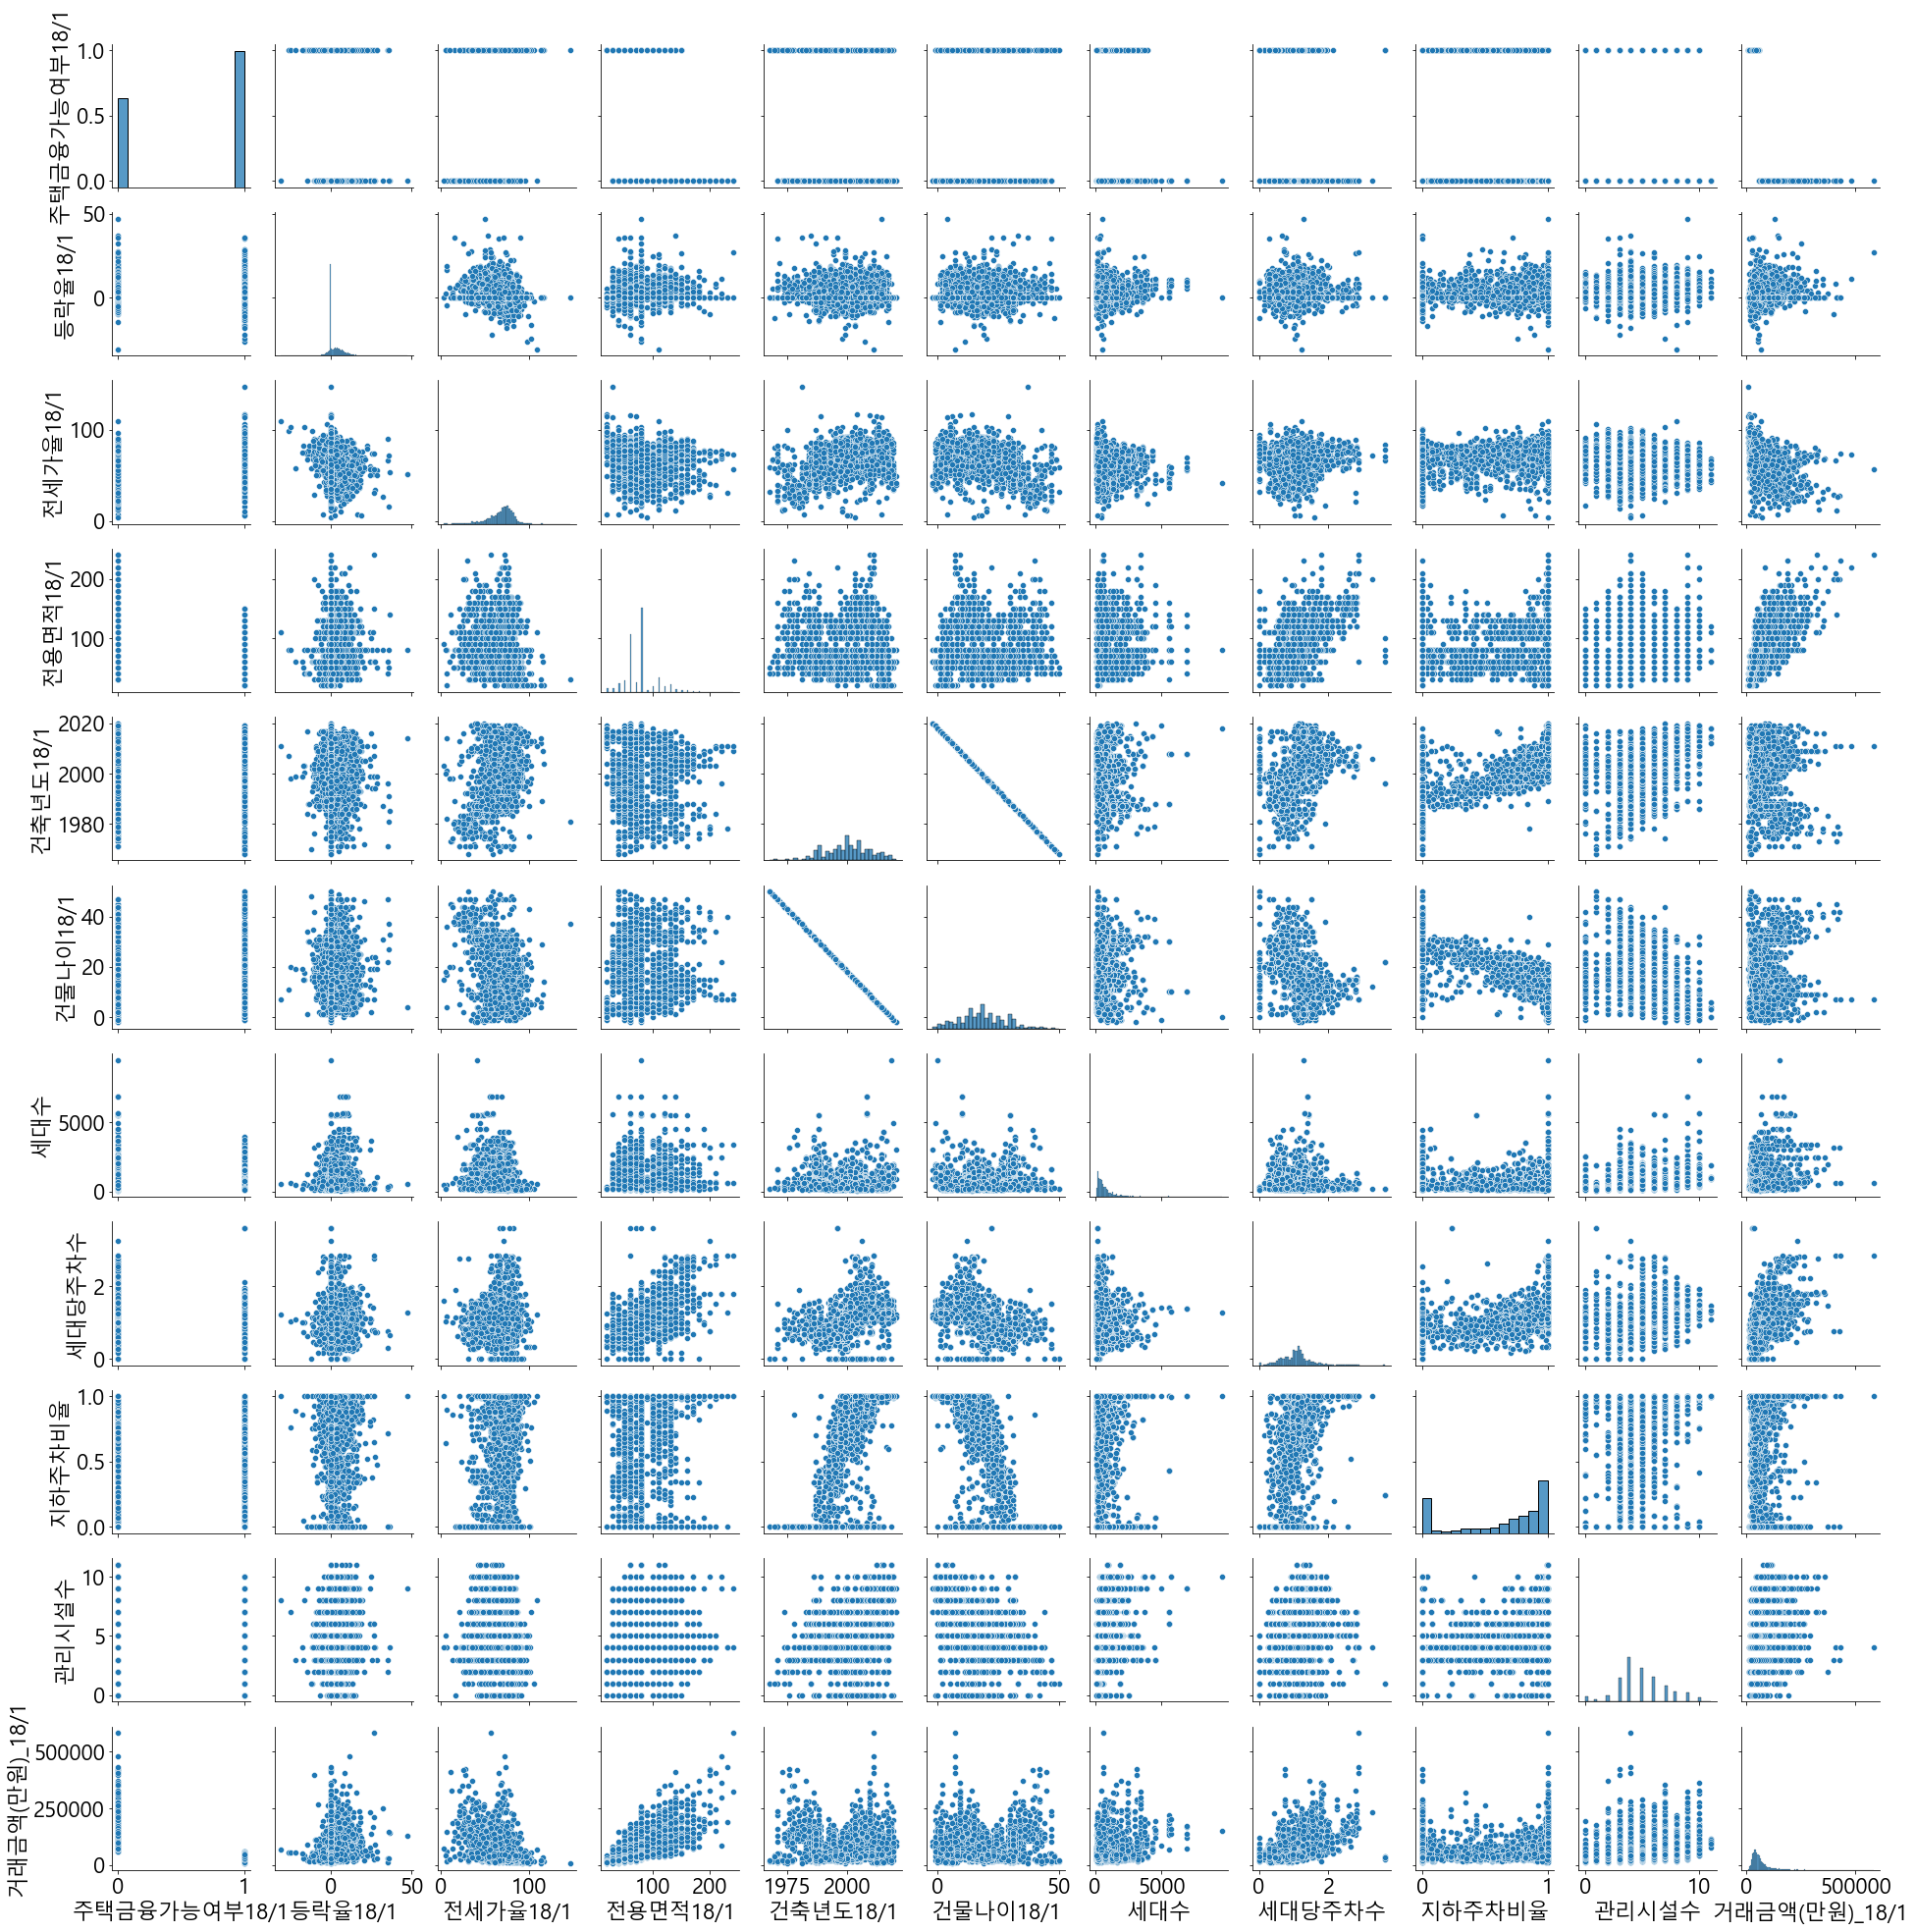

In [6]:
sns.pairplot(data)

<AxesSubplot:xlabel='거래금액(만원)_18/1', ylabel='Density'>

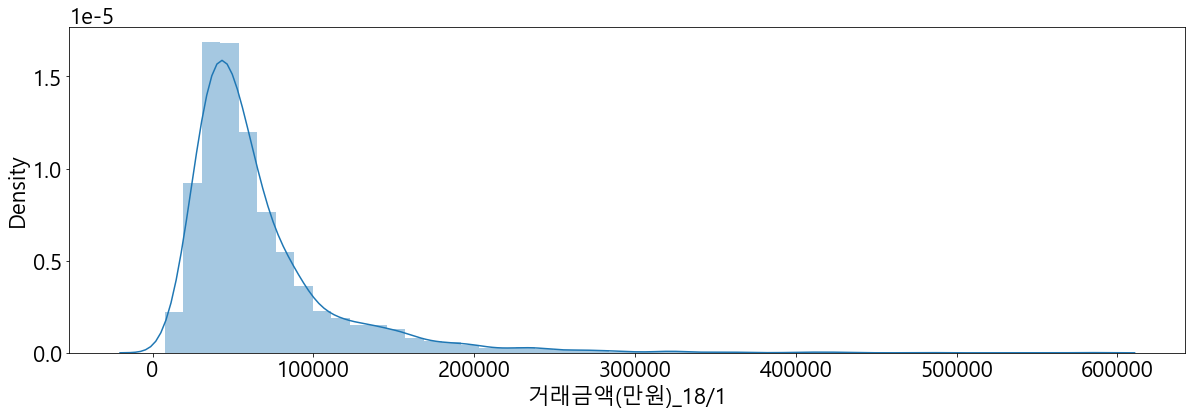

In [7]:
price = data["거래금액(만원)_18/1"]
sns.distplot(price)

In [8]:
del data['ID']
del data['건축년도18/1']

In [9]:
data.dropna(inplace=True)

In [14]:
X = data.drop("거래금액(만원)_18/1", axis = 1)
y = data["거래금액(만원)_18/1"]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(train_X, train_y)

# Inference
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

# RMSE
train_rmse = mean_squared_error(train_y, train_pred, squared = False)
val_rmse = mean_squared_error(val_y, val_pred, squared = False)

# r2 score
train_r2 = r2_score(train_y, train_pred)
val_r2 = r2_score(val_y, val_pred) 


print('MAE & r2 score for train/val data set'), 
print('---------------------------------------------'), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for train dataset".format(train_rmse, train_r2)), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for validation dataset".format(val_rmse, val_r2))

MAE & r2 score for train/val data set
---------------------------------------------
RMSE score:26998.267 , r2 score:0.687 for train dataset
RMSE score:27292.469 , r2 score:0.663 for validation dataset


In [15]:
train_temp = train_X
train_temp = sm.add_constant(train_temp)
ols = sm.OLS(train_y, train_temp).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          거래금액(만원)_18/1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     639.7
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:06:07   Log-Likelihood:                -30637.
No. Observations:                2636   AIC:                         6.129e+04
Df Residuals:                    2626   BIC:                         6.135e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.691e+04   5421.807     17.874      0.000    8.63e+04    1.08e+05
주택금융가능여부18/1 -2.343e+04   1472.971    -15.910      0.000   -2.63e+04   -2.05e+04
등락율18/1        231.9546    109.671      2.115      0.035      16.905     447.005
전세가율18/1     -1295.6809     53.450    -24.241      0.000   -1400.489   -1190.873
전용면적18/1       677.8198     23.449     28.906      0.000     631.839     723.801
건물나이18/1      -257.5212    102.912     -2.502      0.012    -459.317     -55.725
세대수              4.4007      0.705      6.244      0.000       3.019       5.783
세대당주차수        1.833e+04   1770.483     10.353      0.000    1.49e+04    2.18e+04
지하주차비율         154.8474   2468.889      0.063      0.950   -4686.318    4996.013
관리시설수           28.3122    292.781      0.097      0.923    -545.792     602.416
==============================================================================
Omnibus:                     1658.320   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45296.344
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      22.675   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""